In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Set default style for plots
sns.set(style='whitegrid')


In [2]:
# Load the dataset
itc= pd.read_csv(r"/content/ITC-EQ-01-04-2000-to-31-03-2024.csv")
itc


,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [3]:
itc1 = itc.drop(['date','series','prev._close','ltp','vwap','52w_h','52w_l','value','no_of_trades'], axis = 1)

In [4]:
itc1

,open,high,low,close,volume
0,739.90,800.80,721.05,797.00,1720025
1,785.00,785.00,733.25,733.25,581309
2,680.00,740.00,675.05,698.75,706269
3,705.00,711.00,646.10,682.80,431386
4,682.00,733.90,682.00,730.95,1087357
...,...,...,...,...,...
5976,419.00,422.00,416.20,421.25,19227982
5977,421.25,429.65,421.25,428.60,38861818
5978,425.55,429.20,425.55,427.65,10274145
5979,427.00,428.90,426.45,428.00,12227545


In [5]:
itc1.isnull().sum()


,0
open,0
high,0
low,0
close,0
volume,0


In [6]:
itc1.dtypes

,0
open,float64
high,float64
low,float64
close,float64
volume,int64


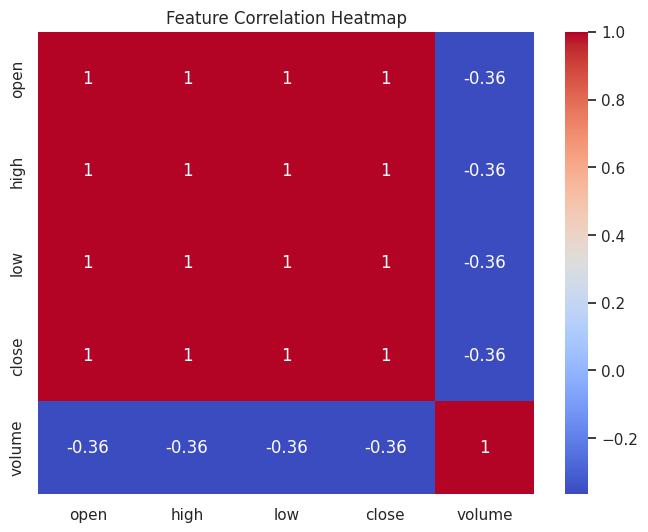

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(itc1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


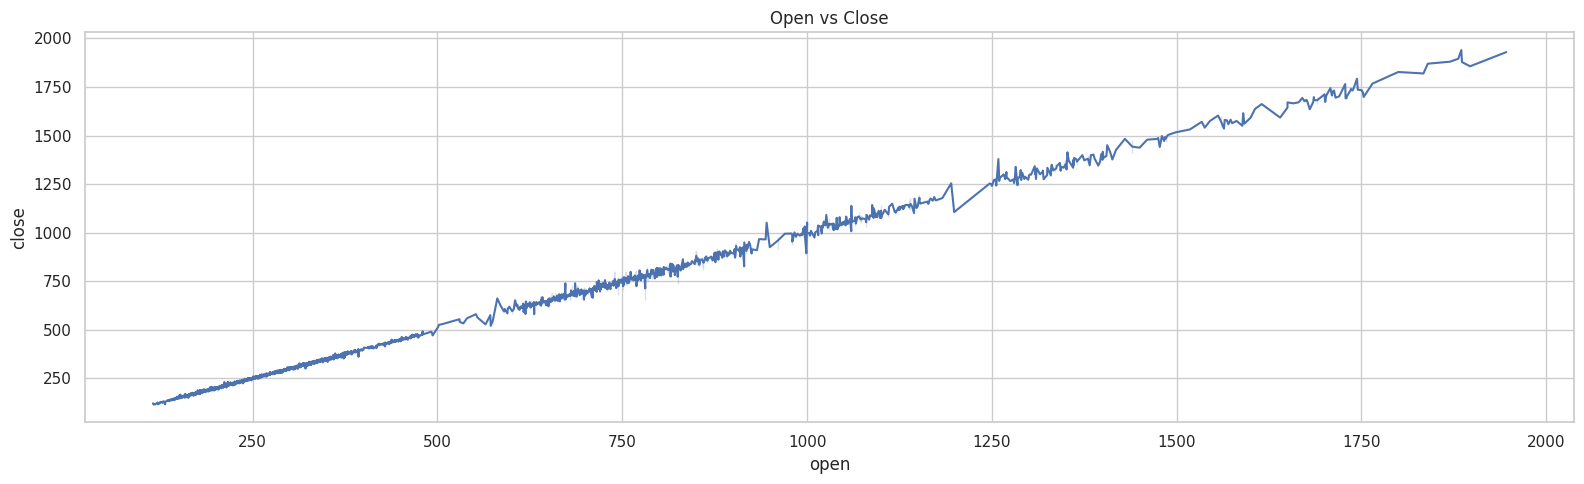

In [9]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=itc1, x='open', y='close')
plt.title("Open vs Close")
plt.tight_layout()
plt.show()


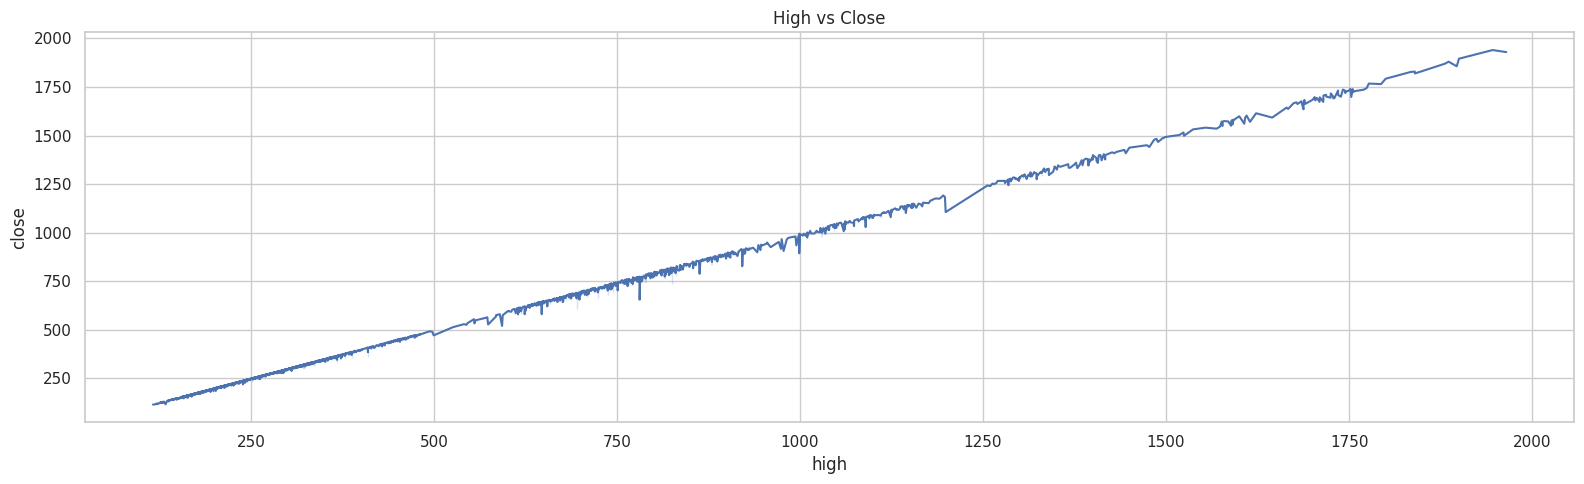

In [11]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=itc1, x='high', y='close')
plt.title("High vs Close")
plt.tight_layout()
plt.show()


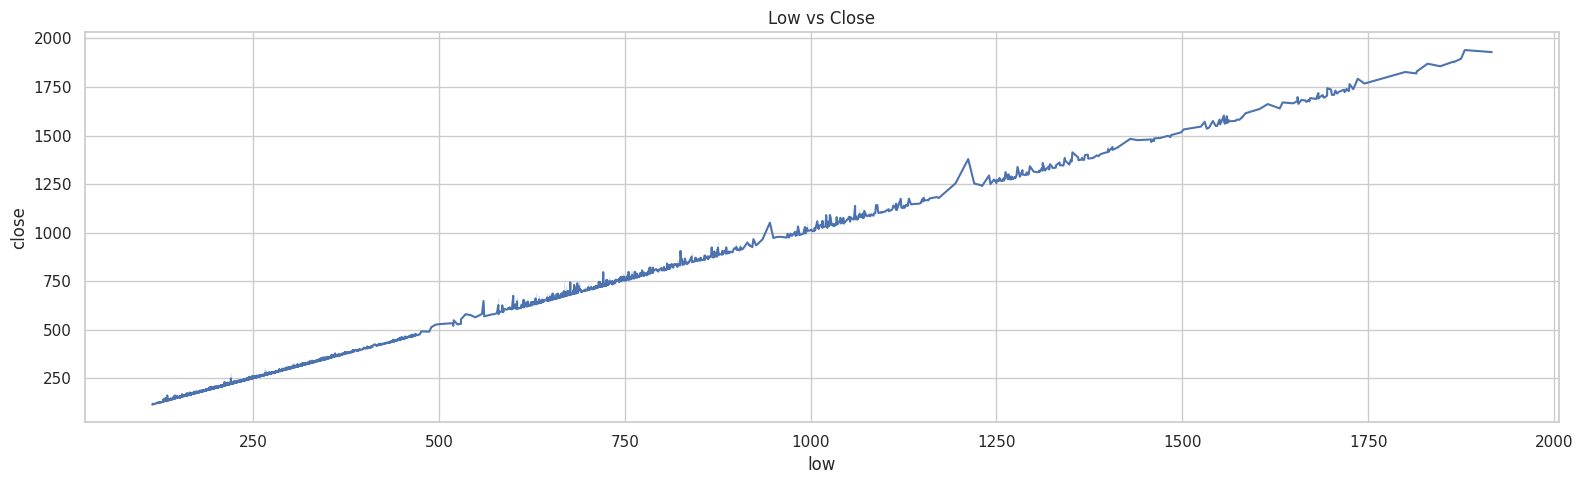

In [12]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=itc1, x='low', y='close')
plt.title("Low vs Close")
plt.tight_layout()
plt.show()

In [13]:
# Define input and output
features = ['open', 'high', 'low', 'volume']
X = itc1[features]
y = itc1['close']


In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Standardize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [17]:
y_pred = model.predict(X_test_scaled)

# Combine predictions and actuals into a DataFrame
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results.head()


,Actual,Predicted
0,251.40,251.723906
1,319.55,325.530712
2,266.95,265.498651
3,165.05,165.416030
4,817.25,822.397434


In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 15.55
R² Score: 0.9998


In [20]:
# Example: Predict with new data [open, high, low, volume]
new_data = np.array([[428.00,433.25,427.00,27933211]])
new_data_scaled = scaler.transform(new_data)
predicted_close = model.predict(new_data_scaled)
print(f"Predicted Close Price: {predicted_close[0]:.2f}")

Predicted Close Price: 430.88


In [21]:
import pickle
with open("itc_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("itc_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)